# Exploring Weather Trends

In this project, I will analyze local and global temperature data and compare the temperature trends where you live (ShenZhen, China) to overall global temperature trends.

My goal is to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where you live.
there are five steps below:

- Find the Nearest City
- Find the Period of Time
- Merge Two Tables
- Calculate Years Simple Moving Average
- Create a Line Chart
- Make Observations about Similarities and Differences

There are three tables in the database:

- city_list - This contains a list of cities and countries in the database. Look through them in order to find the city nearest to you
- city_data - This contains the average temperatures for each city by year (ºC)
- global_data - This contains the average global temperatures by year (ºC)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

PROJECT_ROOT_DIR = ".."
IMAGES_PATH = "../images"

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id+"."+fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 1. Nearest City

In [2]:
ls ../data/

city_data.csv*   city_list.csv*   global_data.csv*


In [3]:
df_city = pd.read_csv("../data/city_list.csv")

In [4]:
df_city.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


In [5]:
df_city.country.value_counts()

United States                         52
China                                 34
India                                 22
Brazil                                11
Pakistan                               9
Russia                                 9
Mexico                                 8
Nigeria                                7
Australia                              6
Indonesia                              6
Japan                                  6
Canada                                 6
United Kingdom                         5
Venezuela                              5
Turkey                                 5
South Africa                           4
Philippines                            3
Ecuador                                3
Taiwan                                 3
Iran                                   3
Spain                                  3
Germany                                3
Argentina                              2
Sudan                                  2
Italy           

In [6]:
df_cn = df_city.query("country=='China'")

In [7]:
df_cn.city.value_counts()

Guiyang      1
Foshan       1
Hefei        1
Qingdao      1
Chengdu      1
Shanghai     1
Jinan        1
Qiqihar      1
Harbin       1
Xuzhou       1
Kunming      1
Changzhou    1
Anshan       1
Wuhan        1
Tianjin      1
Fuzhou       1
Changchun    1
Lanzhou      1
Hangzhou     1
Wuxi         1
Datong       1
Suzhou       1
Nanjing      1
Handan       1
Nanning      1
Nanchang     1
Tangshan     1
Shenyang     1
Dalian       1
Guangzhou    1
Xian         1
Taiyuan      1
Jilin        1
Luoyang      1
Name: city, dtype: int64

**Solution**

By looking through the upper table, I found that `Guangzhou` is nearest from `ShenZhen`.

## 2. Period of Time

In [8]:
df_city = pd.read_csv("../data/city_data.csv")

In [9]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 4 columns):
year        71311 non-null int64
city        71311 non-null object
country     71311 non-null object
avg_temp    68764 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [10]:
df_gz = df_city.query("city=='Guangzhou'")

In [11]:
df_gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 22729 to 22902
Data columns (total 4 columns):
year        174 non-null int64
city        174 non-null object
country     174 non-null object
avg_temp    174 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.8+ KB


In [12]:
df_gz.describe()

,year,avg_temp
count,174.000000,174.000000
mean,1926.500000,21.611207
std,50.373604,0.485201
min,1840.000000,20.400000
25%,1883.250000,21.272500
50%,1926.500000,21.590000
75%,1969.750000,21.980000
max,2013.000000,22.930000


In [13]:
df_global = pd.read_csv("../data/global_data.csv")

In [14]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [15]:
df_global.describe()

,year,avg_temp
count,266.000000,266.000000
mean,1882.500000,8.369474
std,76.931788,0.584747
min,1750.000000,5.780000
25%,1816.250000,8.082500
50%,1882.500000,8.375000
75%,1948.750000,8.707500
max,2015.000000,9.830000


**Conclusion**

As we can analysis `Guangzhou` and `global` database, we can get the time interval of year between `1840` to `2013`.

In [16]:
# filter assign year
df_global = df_global.query("year >= 1840 & year <=2013")

In [17]:
df_global.describe()

,year,avg_temp
count,174.000000,174.000000
mean,1926.500000,8.524713
std,50.373604,0.469801
min,1840.000000,7.560000
25%,1883.250000,8.172500
50%,1926.500000,8.520000
75%,1969.750000,8.760000
max,2013.000000,9.730000


## 3. Merge Table

In [18]:
# filter "year" and "avg_temp" columns
df1 = df_gz.loc[:, ["year", "avg_temp"]]

In [19]:
df1.rename(columns={"avg_temp":"avg_temp_gz"});

In [20]:
df2 = df_global.loc[:, ["year", "avg_temp"]]

In [21]:
df2.rename(columns={"avg_temp":"avg_temp_global"});

In [22]:
# merge two dataframe with the same columns
df = df1.merge(df2, left_on="year", right_on="year", suffixes=("_gz", "_global"))

In [23]:
df['avg_temp_diff'] = df['avg_temp_gz'] - df['avg_temp_global']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 4 columns):
year               174 non-null int64
avg_temp_gz        174 non-null float64
avg_temp_global    174 non-null float64
avg_temp_diff      174 non-null float64
dtypes: float64(3), int64(1)
memory usage: 6.8 KB


In [25]:
df.head()

,year,avg_temp_gz,avg_temp_global,avg_temp_diff
0,1840,20.98,7.80,13.18
1,1841,21.02,7.69,13.33
2,1842,21.16,8.02,13.14
3,1843,21.25,8.17,13.08
4,1844,20.86,7.65,13.21


## 4. Simple Moving Average

In [26]:
df['SMA_10_gz'] = df.iloc[:, 1].rolling(window=10).mean().round(2)
df['SMA_10_global'] = df.iloc[:, 2].rolling(window=10).mean().round(2)
df['SMA_10_diff'] = df['SMA_10_gz'] - df['SMA_10_global']

In [27]:
df.head(10)

,year,avg_temp_gz,avg_temp_global,avg_temp_diff,SMA_10_gz,SMA_10_global,SMA_10_diff
0,1840,20.98,7.80,13.18,NaN,NaN,NaN
1,1841,21.02,7.69,13.33,NaN,NaN,NaN
2,1842,21.16,8.02,13.14,NaN,NaN,NaN
3,1843,21.25,8.17,13.08,NaN,NaN,NaN
4,1844,20.86,7.65,13.21,NaN,NaN,NaN
5,1845,20.84,7.85,12.99,NaN,NaN,NaN
6,1846,21.46,8.55,12.91,NaN,NaN,NaN
7,1847,21.07,8.09,12.98,NaN,NaN,NaN
8,1848,20.75,7.98,12.77,NaN,NaN,NaN
9,1849,21.03,7.98,13.05,21.04,7.98,13.06


In [44]:
df.query("year > 1880 & year < 1890").min()

year               1881.00
avg_temp_gz          20.41
avg_temp_global       7.77
avg_temp_diff        12.64
SMA_10_gz            20.98
SMA_10_global         8.03
SMA_10_diff          12.88
dtype: float64

## 5. Line Chart

In [28]:
?plt.subplot

In [29]:
x = df['year']

y1 = df['avg_temp_gz']
y2 = df['avg_temp_global']
y3 = df['avg_temp_diff']
y4 = df['SMA_10_gz']
y5 = df['SMA_10_global']
y6 = df['SMA_10_diff']

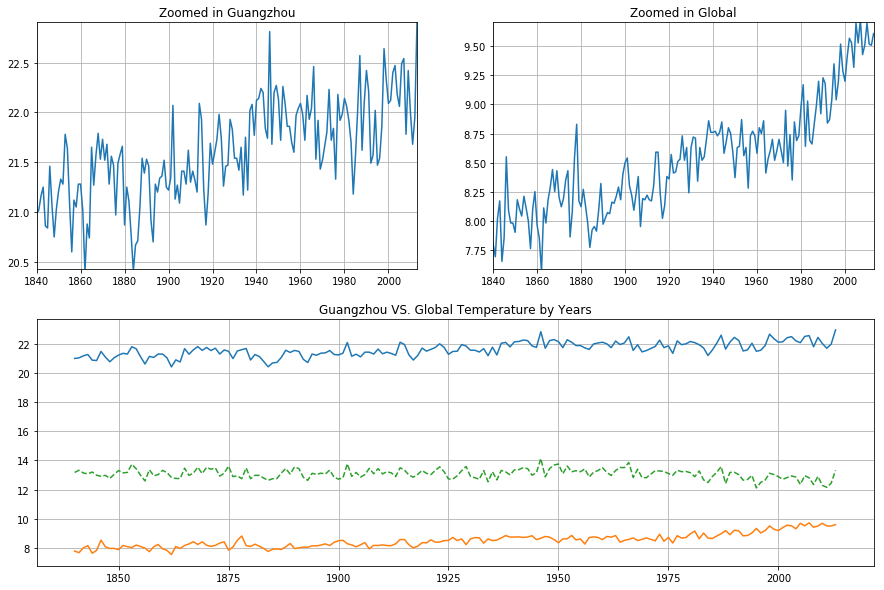

In [41]:
plt.figure(figsize=[15, 10])

ax1 = plt.subplot(212)
ax1.margins(0.05)
ax1.plot(x, y1, label='Years of Guangzhou')
ax1.plot(x, y2, label='Years of Global')
ax1.plot(x, y3, label="Diff", linestyle='--')
ax1.set_title('Guangzhou VS. Global Temperature by Years')
ax1.grid(True)

ax2 = plt.subplot(221)
ax2.margins(x=0, y=-0.01)
ax2.plot(x, y1,)
ax2.set_title('Zoomed in Guangzhou')
ax2.grid(True)

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.01)
ax3.plot(x, y2)
ax3.set_title('Zoomed in Global')
ax3.grid(True);

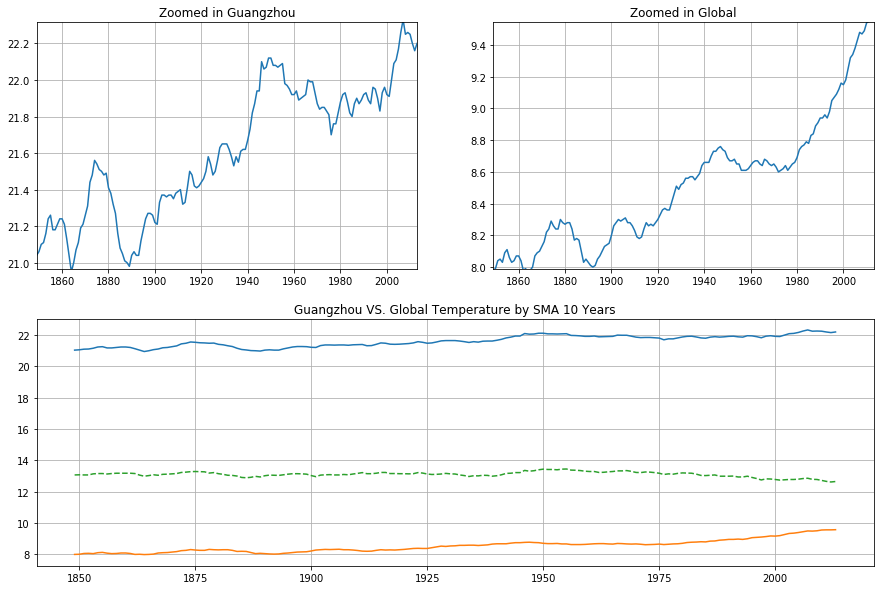

In [40]:
plt.figure(figsize=[15, 10])

ax4 = plt.subplot(212)
ax4.margins(0.05)
ax4.plot(x, y4, label='Years of Guangzhou')
ax4.plot(x, y5, label='Years of Global')
ax4.plot(x, y6, label="Diff", linestyle='--')
ax4.set_title('Guangzhou VS. Global Temperature by SMA 10 Years')
ax4.grid(True)

ax5 = plt.subplot(221)
ax5.margins(x=0, y=-0.01)
ax5.plot(x, y4)
ax5.set_title('Zoomed in Guangzhou')
ax5.grid(True)

ax6 = plt.subplot(222)
ax6.margins(x=0, y=-0.01)
ax6.plot(x, y5)
ax6.set_title('Zoomed in Global')
ax6.grid(True);

## 6. Make Observations

**Similarities**

* Guangzhou and global average temperature are both observed to be consistently increasing in the same upwards pattern after 1881 year.

**Differences**

* global average temperature is growing fast than Guangzhou average temperature after 1980 year.